In [1]:
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def line(x,m,b):
    return m*x+b

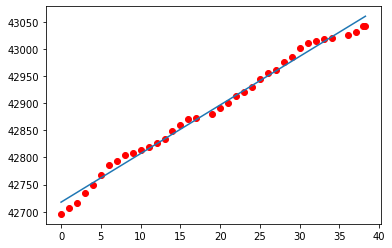

In [5]:
df=pd.read_json('followers.json')

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
plt.plot(df['hours'],df['followers'],'ro')

#Fit:
l,le=optimize.curve_fit(line,df['hours'],df['followers'],p0=[8,40000])
m,b=l
plt.plot(df['hours'],line(df['hours'],m,b))

Prediction

$y=mx+b$ → $x=(y-b)/m$

In [6]:
def hours(y,m,b):
    return (y-b)/m

In [7]:
days=hours(50000,m,b)/24
days

33.89887018824904

In [8]:
t=df.loc[0,'date_time']
t

Timestamp('2021-08-04 22:06:53.668000')

In [14]:
print(f'2021-09-0{int(round(days,0))-(31-t.day)}')

2021-09-07


34.0